<a href="https://colab.research.google.com/github/Eddav29/PCVK_GANJIL_2024/blob/main/pcvk_week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im


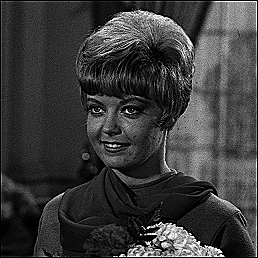

In [7]:
def convolution2d(image, kernel, stride=1, padding=0):
    # Ukuran gambar dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Tambahkan padding ke gambar jika dibutuhkan
    if padding > 0:
        image_padded = np.pad(image, pad_width=padding, mode='constant', constant_values=0)
    else:
        image_padded = image

    # Ukuran gambar setelah padding
    padded_height, padded_width = image_padded.shape

    # Ukuran hasil konvolusi
    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    # Buat output array dengan ukuran hasil konvolusi
    output = np.zeros((output_height, output_width))

    # Lakukan konvolusi
    for y in range(0, output_height):
        for x in range(0, output_width):
            # Region yang akan dikonvolusi
            region = image_padded[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width]
            # Hasil konvolusi untuk posisi saat ini
            output[y, x] = np.sum(region * kernel)

    return output

# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

# Konversi ke grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Kernel untuk sharpening
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Melakukan konvolusi dengan padding=2 dan stride=1
convolved_image = convolution2d(img_gray, kernel_sharpen, stride=1, padding=2)

# Tampilkan hasilnya menggunakan cv2_imshow di Colab
cv2_imshow(convolved_image)


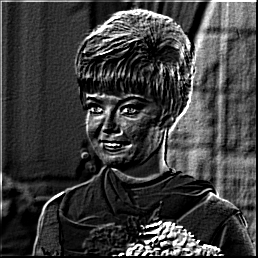

In [8]:
#emboss
emboss = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])

# Melakukan konvolusi dengan padding=2 dan stride=1
convolved_image = convolution2d(img_gray, emboss, stride=1, padding=2)

# Tampilkan hasilnya menggunakan cv2_imshow di Colab
cv2_imshow(convolved_image)

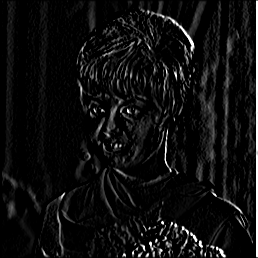

In [9]:
leftSobelEdgeDetection = np.array([[1, 0, -1],
                                   [2, 0, -2],
                                   [1, 0, -1]])

convolved_image = convolution2d(img_gray, leftSobelEdgeDetection, stride=1, padding=2)

# Tampilkan hasilnya menggunakan cv2_imshow di Colab
cv2_imshow(convolved_image)

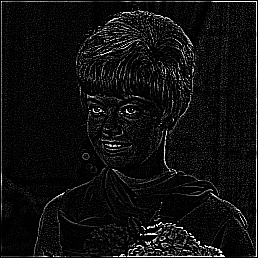

In [10]:
cannyEdgeDetection = np.array([[-1, -1, -1],
                               [-1, 8, -1],
                               [-1, -1, -1]])

convolved_image = convolution2d(img_gray, cannyEdgeDetection, stride=1, padding=2)

# Tampilkan hasilnya menggunakan cv2_imshow di Colab
cv2_imshow(convolved_image)

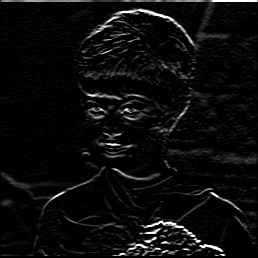

In [11]:
prewitEdgeDetection = np.array([[-1, -1, -1],
                               [0, 0, 0],
                               [1, 1, 1]])

convolved_image = convolution2d(img_gray, prewitEdgeDetection, stride=1, padding=2)

# Tampilkan hasilnya menggunakan cv2_imshow di Colab
cv2_imshow(convolved_image)

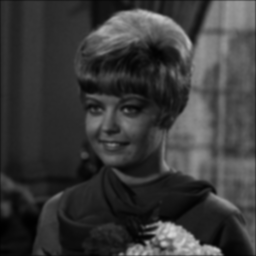

In [12]:
# Kernel for Gaussian blur
kernel_gaussian = (1/256) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, 36, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])

# Melakukan konvolusi dengan padding=2 dan stride=1
convolved_image = convolution2d(img_gray, kernel_gaussian, stride=1, padding=2)

# Tampilkan hasilnya menggunakan cv2_imshow di Colab
cv2_imshow(convolved_image)

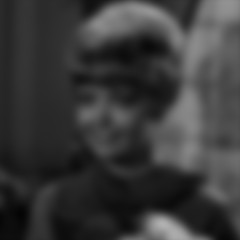

In [13]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gaussian_kernel = gaussian_kernel @ gaussian_kernel.transpose()

# Lakukan konvolusi dengan kernel Gaussian
convolved_image = convolution2d(img_gray, gaussian_kernel, stride=1, padding=2)

# Tampilkan hasil
cv2_imshow(convolved_image)